Scripts that take pre-processed data (usually big numpy tables) and output either a nice graph or a friendly little csv table wit ordered data to put directly in GraphPad or Excel

### Import modules and files

In [1]:
import numpy as np
import os
import pandas as pd
from scipy import signal
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
# For each mouse, import 4 baselines (S1 & PFC and midline & vb) and 2 stim results files (midline & vb)

#Mouse 13
base13mid = np.load(f"13 and 14/13/Pre-stim baseline ALL ELES mouse13 mid.npy")
base13vb = np.load(f"13 and 14/13/Pre-stim baseline ALL ELES mouse13 vb.npy")
stim13mid = np.load(f"13 and 14/13/SWS rawSTIMS - Mouse 13 - midline.npy")
stim13vb = np.load(f"13 and 14/13/SWS rawSTIMS - Mouse 13 - vb.npy")

#Mouse 14
base14mid = np.load(f"13 and 14/14/Pre-stim baseline ALL ELES mouse14 mid.npy")
base14vb = np.load(f"13 and 14/14/Pre-stim baseline ALL ELES mouse14 vb.npy")
stim14mid = np.load(f"13 and 14/14/SWS rawSTIMS - Mouse 14 - midline.npy")
stim14vb = np.load(f"13 and 14/14/SWS rawSTIMS - Mouse 14 - vb.npy")

#Mouse 17
base17mid = np.load(f"17 and 18/17/Pre-stim baseline ALL ELES mouse17 mid.npy")
base17vb = np.load(f"17 and 18/17/Pre-stim baseline ALL ELES mouse17 vb.npy")
stim17mid = np.load(f"17 and 18/17/SWS rawSTIMS - Mouse 17 - midline.npy")
stim17vb = np.load(f"17 and 18/17/SWS rawSTIMS - Mouse 17 - vb.npy")

#Mouse 18
base18mid = np.load(f"17 and 18/18/Pre-stim baseline ALL ELES mouse18 mid.npy")
base18vb = np.load(f"17 and 18/18/Pre-stim baseline ALL ELES mouse18 vb.npy")
stim18mid = np.load(f"17 and 18/18/SWS rawSTIMS - Mouse 18 - midline.npy")
stim18vb = np.load(f"17 and 18/18/SWS rawSTIMS - Mouse 18 - vb.npy")

#Mouse 19
base19mid = np.load(f"19 and 20/19/Pre-stim baseline ALL ELES mouse19 mid.npy")
base19vb = np.load(f"19 and 20/19/Pre-stim baseline ALL ELES mouse19 vb.npy")
stim19mid = np.load(f"19 and 20/19/SWS rawSTIMS - Mouse 19 - midline.npy")
stim19vb = np.load(f"19 and 20/19/SWS rawSTIMS - Mouse 19 - vb.npy")

#Mouse 20
base20mid = np.load(f"19 and 20/20/Pre-stim baseline ALL ELES mouse20 mid.npy")
base20vb = np.load(f"19 and 20/20/Pre-stim baseline ALL ELES mouse20 vb.npy")
stim20mid = np.load(f"19 and 20/20/SWS rawSTIMS - Mouse 20 - mid.npy")
stim20vb = np.load(f"19 and 20/20/SWS rawSTIMS - Mouse 20 - vb.npy")

mice = [13, 14, 17, 18, 19, 20]

In [9]:
#Normalise data

norm13mid = np.divide(stim13mid, base13mid)
norm13vb = np.divide(stim13vb, base13vb)

norm14mid = np.divide(stim14mid, base14mid)
norm14vb = np.divide(stim14vb, base14vb)

norm17mid = np.divide(stim17mid, base17mid)
norm17vb = np.divide(stim17vb, base17vb)

norm18mid = np.divide(stim18mid, base18mid)
norm18vb = np.divide(stim18vb, base18vb)

norm19mid = np.divide(stim19mid, base19mid)
norm19vb = np.divide(stim19vb, base19vb)

norm20mid = np.divide(stim20mid, base20mid)
norm20vb = np.divide(stim20vb, base20vb)

### Result graph 1: Compare sigma power in S1 and PFC from baseline, midline stim and vb stim

In [92]:
# I want 6 numbers per mouse: base, mid and vb for S1 and PFC

#format: mouseinfo = [mouse nb, S1 ele, PFC ele]
miceinfo = [[13, 5, 11], [14, 5, 9], [17, 5, 11], [18, 9, 13], [19, 3, 11], [20 ,4, 11]]

micedata = []
for mouseinfo in miceinfo:
    mousedata = []
    for x, cx in enumerate(["S1", "PFC"]):
        mouse = mouseinfo[0]
        ele = mouseinfo[x+1]

        print(mouse, cx, ele)
        
        exec(f"base = np.mean((base{mouse}mid{cx}[5, 5], base{mouse}mid{cx}[6, 6], base{mouse}mid{cx}[7, 7], base{mouse}mid{cx}[8, 8], base{mouse}vb{cx}[5, 5], base{mouse}vb{cx}[6, 6], base{mouse}vb{cx}[7, 7], base{mouse}vb{cx}[8, 8]))")
        exec(f"stim_mid = np.mean((stim{mouse}mid[ele,5,5], stim{mouse}mid[ele,6,6], stim{mouse}mid[ele,7,7], stim{mouse}mid[ele,8,8]))")
        exec(f"stim_vb = np.mean((stim{mouse}vb[ele,5,5], stim{mouse}vb[ele,6,6], stim{mouse}vb[ele,7,7], stim{mouse}vb[ele,8,8]))")

        mousedata.append(base)
        mousedata.append(stim_mid)
        mousedata.append(stim_vb)
        print(base, stim_mid, stim_vb)
    
    print(mousedata)
    micedata.append(mousedata)

print(micedata)
micedata = np.array(micedata)
np.save("sigma power increase S1 and PFC for mid vb stim.npy", micedata); np.savetxt("sigma power increase S1 and PFC for mid vb stim.csv", micedata, fmt='%10.2f')

13 S1 5
833.055958550239 1148.6769056043272 6376.967007405907
13 PFC 11
220.96408184728557 616.6147446790143 279.7064250751272
[833.055958550239, 1148.6769056043272, 6376.967007405907, 220.96408184728557, 616.6147446790143, 279.7064250751272]
14 S1 5
329.66529541679967 431.75020856385936 1877.408708303489
14 PFC 9
133.0779200753007 324.1032905398906 216.31218063072492
[329.66529541679967, 431.75020856385936, 1877.408708303489, 133.0779200753007, 324.1032905398906, 216.31218063072492]
17 S1 5
864.4089908751273 1282.2658648066642 2187.751332298545
17 PFC 11
283.0254934966954 679.557898845535 294.6728226052245
[864.4089908751273, 1282.2658648066642, 2187.751332298545, 283.0254934966954, 679.557898845535, 294.6728226052245]
18 S1 9
1114.59651839267 1878.892891864815 5886.237838498868
18 PFC 13
1002.888809348981 4235.881396099285 989.8743934778877
[1114.59651839267, 1878.892891864815, 5886.237838498868, 1002.888809348981, 4235.881396099285, 989.8743934778877]
19 S1 3
612.4697586289969 879.2

In [22]:
#Updated
# I want 8 numbers per mouse: BaseMidS1 StimMidS1, BaseMidPFC, StimMidPFC, BaseVBS1, StimVBS1, BaseVBPFC, StimVBPFC

#format: mouseinfo = [mouse nb, S1 ele, PFC ele]
miceinfo = [[13, 5, 11], [14, 5, 9], [17, 5, 11], [18, 9, 13], [19, 3, 11], [20 ,4, 11]]

micedata = []
for mouseinfo in miceinfo:
    mousedata = []
    for x, cx in enumerate(["S1", "PFC"]):
        mouse = mouseinfo[0]
        ele = mouseinfo[x+1]

        print(mouse, cx, ele)
        
        exec(f"base_mid = np.mean((base{mouse}mid[ele, 5, 5], base{mouse}mid[ele, 6, 6], base{mouse}mid[ele, 7, 7], base{mouse}mid[ele, 8, 8]))")
        exec(f"base_vb = np.mean((base{mouse}vb[ele, 5, 5], base{mouse}vb[ele, 6, 6], base{mouse}vb[ele, 7, 7], base{mouse}vb[ele, 8, 8]))")
        exec(f"stim_mid = np.mean((stim{mouse}mid[ele,5,5], stim{mouse}mid[ele,6,6], stim{mouse}mid[ele,7,7], stim{mouse}mid[ele,8,8]))")
        exec(f"stim_vb = np.mean((stim{mouse}vb[ele,5,5], stim{mouse}vb[ele,6,6], stim{mouse}vb[ele,7,7], stim{mouse}vb[ele,8,8]))")

        mousedata.append(base_mid)
        mousedata.append(stim_mid)
        mousedata.append(base_vb)
        mousedata.append(stim_vb)
        print(base_mid, stim_mid, stim_vb)
    
    print(mousedata)
    micedata.append(mousedata)

print(micedata)
micedata = np.array(micedata)
np.save("sigma power increase S1 PFC mid vb UPDATED.npy", micedata); np.savetxt("sigma power increase S1 PFC mid vb UPDATED.csv", micedata, fmt='%10.2f')

13 S1 5
594.6309933308597 1148.6769056043272 6376.967007405907
13 PFC 11
229.0128986170343 616.6147446790143 279.7064250751272
[594.6309933308597, 1148.6769056043272, 1071.4809237696181, 6376.967007405907, 229.0128986170343, 616.6147446790143, 212.9152650775368, 279.7064250751272]
14 S1 5
283.90369009861615 431.75020856385936 1877.408708303489
14 PFC 9
129.830855977917 324.1032905398906 216.31218063072492
[283.90369009861615, 431.75020856385936, 375.4269007349832, 1877.408708303489, 129.830855977917, 324.1032905398906, 136.32498417268445, 216.31218063072492]
17 S1 5
809.4120486686381 1282.2658648066642 2187.751332298545
17 PFC 11
295.1653454713078 679.557898845535 294.6728226052245
[809.4120486686381, 1282.2658648066642, 919.4059330816165, 2187.751332298545, 295.1653454713078, 679.557898845535, 270.88564152208295, 294.6728226052245]
18 S1 9
921.4923379089164 1878.892891864815 5886.237838498868
18 PFC 13
1055.867028076108 4235.881396099285 989.8743934778877
[921.4923379089164, 1878.8928

In [71]:
# Stats test (according to chatgpt)
import numpy as np
from scipy.stats import wilcoxon
from statsmodels.stats.multitest import multipletests

# Sample data
baseline = micedata[:,0]
stimulated = micedata[:,2]

# Perform the Wilcoxon signed-rank test
stat, p_value = wilcoxon(baseline, stimulated)

# Bonferroni correction
# Since we are performing only one test, we need to adjust the alpha level
p_values_corrected = multipletests([p_value], alpha=0.05, method='bonferroni')

# Extract the corrected p-value
p_value_corrected = p_values_corrected[1][0]

# Print the results
print(f'Wilcoxon signed-rank test statistic: {stat}')
print(f'Original p-value: {p_value}')
print(f'Corrected p-value: {p_value_corrected}')


Wilcoxon signed-rank test statistic: 0.0
Original p-value: 0.03125
Corrected p-value: 0.03125


### Results: sigma increase brain map

In [86]:
# Get normalised sigma increase for every Ele; use only spindle freq stimulations and corresponding CWT freq
# Dimensions meanings of input data: (ele, stim freq, cwt freq)

for stimregion in ["mid", "vb"]:
    for mouse in mice:
        for ele in range(15):
            globals()[f"value{mouse}_{ele}_{stimregion}"] = np.mean((globals()[f"norm{mouse}{stimregion}"][ele,5,5], globals()[f"norm{mouse}{stimregion}"][ele,6,6], globals()[f"norm{mouse}{stimregion}"][ele,7,7], globals()[f"norm{mouse}{stimregion}"][ele,8,8]))


In [89]:
#Midline
mouse13_mid = [[-0.2, 3, value13_0_mid], [-3.4, -3, value13_1_mid], [-1.8, 1.2, value13_2_mid], [-2.5, -3, value13_3_mid], [-3.4, -2, value13_4_mid], [-1.5, -3, value13_5_mid], [-1.8, -1.2, value13_6_mid], [-0.2, -3, value13_7_mid], [0.2, -2, value13_8_mid], [-1, -0.5, value13_9_mid], [0, -0.5, value13_10_mid], [2.8, -0.4, value13_11_mid], [1.96, 0.4, value13_12_mid], [1.96, -0.4, value13_13_mid], [1.3, -0.8, value13_14_mid]]

mouse14_mid = [[-3.4, -2, value14_0_mid], [-1, -0.5, value14_1_mid], [-3.4, -3, value14_2_mid], [-2.5, -3, value14_3_mid], [1.3, -0.8, value14_4_mid], [-1.5, -3, value14_5_mid], [-0.2, -3, value14_6_mid], [0.2, -2, value14_7_mid], [-1.8, -1.2, value14_8_mid], [2.8, -0.4, value14_9_mid], [1.96, -0.4, value14_10_mid], [1.96, 0.4, value14_11_mid], [-0.2, 3, value14_12_mid], [0, -0.5, value14_13_mid], [-1.8, 1.2, value14_14_mid]]

mouse17_mid= [[0, -2, value17_0_mid], [-3, -1.25, value17_1_mid], [-1.7, 1.25, value17_2_mid], [-1.5, -2, value17_3_mid], [-1.7, -1.25, value17_4_mid], [-0.75, -3.5, value17_5_mid], [-1.5, -0.5, value17_6_mid], [-2.25, -3.5, value17_7_mid], [0, -0.5, value17_8_mid], [1.5, -2, value17_9_mid], [1.5, -0.5, value17_10_mid], [3, -0.5, value17_11_mid], [1.5, 1, value17_12_mid], [-0.75, 3, value17_13_mid], [-3, -2.5, value17_14_mid]]

mouse18_mid = [[-3, -1.25, value18_0_mid], [-3, -2.5, value18_1_mid], [-2.25, -3.5, value18_2_mid], [-1.7, 1.25, value18_3_mid], [-1.7, -1.25, value18_4_mid], [0, -0.5, value18_5_mid], [-1.5, -0.5, value18_6_mid], [-1.5, -2, value18_7_mid], [1.5, -2, value18_8_mid], [-0.75, -3.5, value18_9_mid], [0, -2, value18_10_mid], [1.5, -0.5, value18_11_mid], [-0.75, 3, value18_12_mid], [3, -0.5, value18_13_mid], [1.5, 1, value18_14_mid]]

mouse19_mid = [[-1.5, -0.5, value19_0_mid], [-3, -1.25, value19_1_mid], [-3, -2.5, value19_2_mid], [-2.25, -3.5, value19_3_mid], [-0.75, -3.5, value19_4_mid], [-1.5, -2, value19_5_mid], [0, -2, value19_6_mid], [-1.7, -1.25, value19_7_mid], [1.5, -0.5, value19_8_mid], [1.5, -2, value19_9_mid], [0, -0.5, value19_10_mid], [3, -0.5, value19_11_mid], [1.5, 1, value19_12_mid], [-0.75, 3, value19_13_mid], [-1.7, 1.25, value19_14_mid]]

mouse20_mid = [[-1.5, -0.5, value20_0_mid], [-3, -2.5, value20_1_mid], [-3, -1.25, value20_2_mid], [-2.25, -3.5, value20_3_mid], [-0.75, -3.5, value20_4_mid], [-1.7, -1.25, value20_5_mid], [-1.5, -2, value20_6_mid], [0, -2, value20_7_mid], [0, -0.5, value20_8_mid], [1.5, -2, value20_9_mid], [1.5, -0.5, value20_10_mid], [3, -0.5, value20_11_mid], [-0.75, 3, value20_12_mid], [1.5, 1, value20_13_mid], [-1.7, 1.25, value20_14_mid]]


# VB
mouse13_vb = [[-0.2, 3, value13_0_vb], [-3.4, -3, value13_1_vb], [-1.8, 1.2, value13_2_vb], [-2.5, -3, value13_3_vb], [-3.4, -2, value13_4_vb], [-1.5, -3, value13_5_vb], [-1.8, -1.2, value13_6_vb], [-0.2, -3, value13_7_vb], [0.2, -2, value13_8_vb], [-1, -0.5, value13_9_vb], [0, -0.5, value13_10_vb], [2.8, -0.4, value13_11_vb], [1.96, 0.4, value13_12_vb], [1.96, -0.4, value13_13_vb], [1.3, -0.8, value13_14_vb]]

mouse14_vb = [[-3.4, -2, value14_0_vb], [-1, -0.5, value14_1_vb], [-3.4, -3, value14_2_vb], [-2.5, -3, value14_3_vb], [1.3, -0.8, value14_4_vb], [-1.5, -3, value14_5_vb], [-0.2, -3, value14_6_vb], [0.2, -2, value14_7_vb], [-1.8, -1.2, value14_8_vb], [2.8, -0.4, value14_9_vb], [1.96, -0.4, value14_10_vb], [1.96, 0.4, value14_11_vb], [-0.2, 3, value14_12_vb], [0, -0.5, value14_13_vb], [-1.8, 1.2, value14_14_vb]]

mouse17_vb= [[0, -2, value17_0_vb], [-3, -1.25, value17_1_vb], [-1.7, 1.25, value17_2_vb], [-1.5, -2, value17_3_vb], [-1.7, -1.25, value17_4_vb], [-0.75, -3.5, value17_5_vb], [-1.5, -0.5, value17_6_vb], [-2.25, -3.5, value17_7_vb], [0, -0.5, value17_8_vb], [1.5, -2, value17_9_vb], [1.5, -0.5, value17_10_vb], [3, -0.5, value17_11_vb], [1.5, 1, value17_12_vb], [-0.75, 3, value17_13_vb], [-3, -2.5, value17_14_vb]]

mouse18_vb = [[-3, -1.25, value18_0_vb], [-3, -2.5, value18_1_vb], [-2.25, -3.5, value18_2_vb], [-1.7, 1.25, value18_3_vb], [-1.7, -1.25, value18_4_vb], [0, -0.5, value18_5_vb], [-1.5, -0.5, value18_6_vb], [-1.5, -2, value18_7_vb], [1.5, -2, value18_8_vb], [-0.75, -3.5, value18_9_vb], [0, -2, value18_10_vb], [1.5, -0.5, value18_11_vb], [-0.75, 3, value18_12_vb], [3, -0.5, value18_13_vb], [1.5, 1, value18_14_vb]]

mouse19_vb = [[-1.5, -0.5, value19_0_vb], [-3, -1.25, value19_1_vb], [-3, -2.5, value19_2_vb], [-2.25, -3.5, value19_3_vb], [-0.75, -3.5, value19_4_vb], [-1.5, -2, value19_5_vb], [0, -2, value19_6_vb], [-1.7, -1.25, value19_7_vb], [1.5, -0.5, value19_8_vb], [1.5, -2, value19_9_vb], [0, -0.5, value19_10_vb], [3, -0.5, value19_11_vb], [1.5, 1, value19_12_vb], [-0.75, 3, value19_13_vb], [-1.7, 1.25, value19_14_vb]]

mouse20_vb = [[-1.5, -0.5, value20_0_vb], [-3, -2.5, value20_1_vb], [-3, -1.25, value20_2_vb], [-2.25, -3.5, value20_3_vb], [-0.75, -3.5, value20_4_vb], [-1.7, -1.25, value20_5_vb], [-1.5, -2, value20_6_vb], [0, -2, value20_7_vb], [0, -0.5, value20_8_vb], [1.5, -2, value20_9_vb], [1.5, -0.5, value20_10_vb], [3, -0.5, value20_11_vb], [-0.75, 3, value20_12_vb], [1.5, 1, value20_13_vb], [-1.7, 1.25, value20_14_vb]]

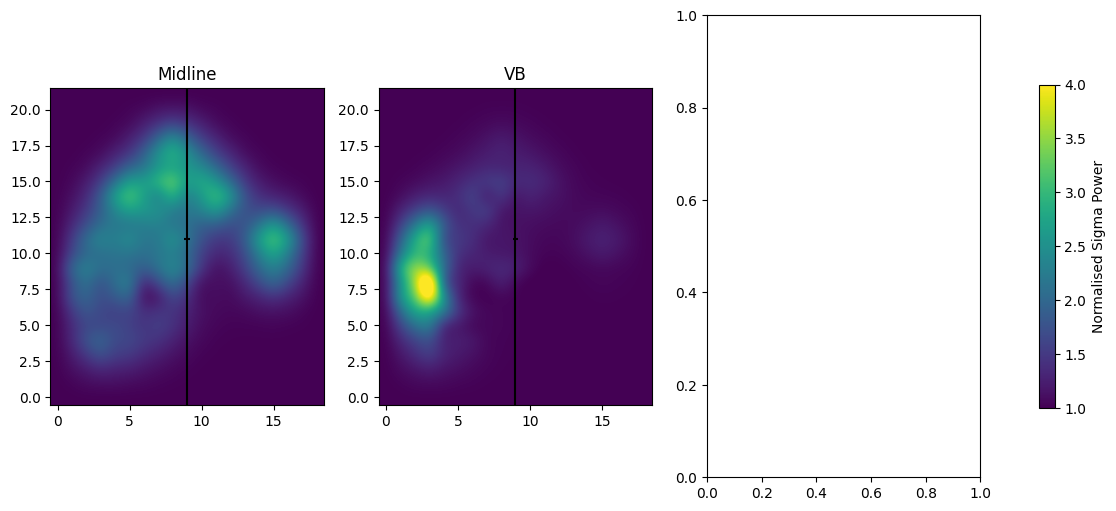

In [107]:
#### GENERAL INTENSITY - THE VIRIDIS GRAPH ####
choisi = 'prep'; interpolation = 'none'; aspect = 'pix'
choisi = 'final'; interpolation = 'bicubic'; aspect = 'blur'

# Midline
cerveau = pd.DataFrame(np.zeros((22, 19)), 
                       index= [str(round(elem*2)/2) for elem in np.arange(-5.5,5.5,0.5)], 
                       columns=[str(round(elem*2)/2) for elem in np.arange(-4.5,5,0.5)])
cerveau_count = cerveau.copy()

axe_interhemis = cerveau.columns.get_loc('0.0')
bregma = cerveau.index.get_loc('0.0')
ca1_l = cerveau.columns.get_loc(str(round(-1.2*2)/2))
ca1_r = cerveau.columns.get_loc(str(round(1.2*2)/2))
ca1_row = cerveau.index.get_loc(str(round(-1.8*2)/2))

for mouse in mice:
    mouse_array = np.array(globals()[f"mouse{mouse}_mid"])
    #mouse_array[:,2] *= globals()[f"lautre_souris{mouse}"]
    for ele in range(15):
        x_pos = str(round(mouse_array[ele,0]*2)/2)
        y_pos = str(round(mouse_array[ele,1]*2)/2)
        value = mouse_array[ele,2]

        #Add value at given position in brain array
        cerveau.loc[x_pos, y_pos] += value
        #Adjust count in counting array (needed for averaging/normalising later)
        cerveau_count.loc[x_pos, y_pos] += 1

cerveau = np.array(cerveau)
cerveau_count = np.array(cerveau_count)
for row in range(len(cerveau[:,0])):
    for column in range(len(cerveau[0,:])):
        if cerveau[row, column] == 0:
            cerveau[row, column] = 1
            cerveau_count[row, column] = 1
cerveau = cerveau/cerveau_count     #average/normalise by dividing by nb of mice contributing to individual locations
cerveau_prep1 = cerveau


# VB
cerveau = pd.DataFrame(np.zeros((22, 19)), 
                       index= [str(round(elem*2)/2) for elem in np.arange(-5.5,5.5,0.5)], 
                       columns=[str(round(elem*2)/2) for elem in np.arange(-4.5,5,0.5)])
cerveau_count = cerveau.copy()

axe_interhemis = cerveau.columns.get_loc('0.0')
bregma = cerveau.index.get_loc('0.0')
ca1_l = cerveau.columns.get_loc(str(round(-1.2*2)/2))
ca1_r = cerveau.columns.get_loc(str(round(1.2*2)/2))
ca1_row = cerveau.index.get_loc(str(round(-1.8*2)/2))

for mouse in mice:
    mouse_array = np.array(globals()[f"mouse{mouse}_vb"])
    #mouse_array[:,2] *= globals()[f"lautre_souris{mouse}"]
    for ele in range(15):
        x_pos = str(round(mouse_array[ele,0]*2)/2)
        y_pos = str(round(mouse_array[ele,1]*2)/2)
        value = mouse_array[ele,2]

        #Add value at given position in brain array
        cerveau.loc[x_pos, y_pos] += value
        #Adjust count in counting array (needed for averaging/normalising later)
        cerveau_count.loc[x_pos, y_pos] += 1

cerveau = np.array(cerveau)
cerveau_count = np.array(cerveau_count)
for row in range(len(cerveau[:,0])):
    for column in range(len(cerveau[0,:])):
        if cerveau[row, column] == 0:
            cerveau[row, column] = 1
            cerveau_count[row, column] = 1
cerveau = cerveau/cerveau_count     #average/normalise by dividing by nb of mice contributing to individual locations
cerveau_prep2 = cerveau



# Smooth out contour of recording sites
for nb in range(1,3):
    cerveau = globals()[f"cerveau_prep{nb}"]
    cerveau2 = cerveau.copy()
    cerveau2 = np.array(cerveau2)
    for row in range(1,len(cerveau[:,0])-1):
        for column in range(1,len(cerveau[0,:])-1):
            if cerveau[row, column] == 1:
                cerveau2[row, column] = np.mean([cerveau[row+1, column], cerveau[row, column+1], cerveau[row-1, column], cerveau[row, column-1]])
    for row in range(1,len(cerveau[:,0])-1):
        for column in range(1,len(cerveau[0,:])-1):
            if cerveau[row, column] != 1 and not (row==ca1_row and (column==ca1_l or column==ca1_r)):
                cerveau2[row, column] = cerveau[row, column]
                var = 10
                cerveau2[row-1, column] = np.sum([var*cerveau[row, column], cerveau[row-1, column+1], cerveau[row-2, column], cerveau[row-1, column-1]])/(3+var)
                cerveau2[row+1, column] = np.sum([cerveau[row+2, column], cerveau[row+1, column+1], var*cerveau[row, column], cerveau[row+1, column-1]])/(3+var)
                cerveau2[row, column-1] = np.sum([cerveau[row+1, column-1], var*cerveau[row, column], cerveau[row-1, column-1], cerveau[row, column-2]])/(3+var)
                cerveau2[row, column+1] = np.sum([cerveau[row+1, column+1], cerveau[row, column+2], cerveau[row-1, column+1], var*cerveau[row, column]])/(3+var)
    cerveau3 = cerveau2.copy()

    # Expand the smoothing/color gradient even more, but less agressively
    for iteration in range(5):
        #print(iteration)
        cerveau4 = cerveau3.copy()
        for row in range(1,len(cerveau2[:,0])-1):
            for column in range(1,len(cerveau2[0,:])-1):
                if cerveau2[row, column] != 1:
                    cerveau4[row, column] = cerveau2[row, column]
                else:
                    cerveau4[row, column] = np.mean([cerveau3[row+1, column], cerveau3[row, column+1],cerveau3[row-1, column],cerveau3[row, column-1]])
        cerveau3 = cerveau4
    globals()[f"cerveau_final{nb}"] = cerveau3

for nb in range(1,3):
    globals()[f"cerveau_fig{nb}"] = globals()[f"cerveau_{choisi}{nb}"]

fig, ax = plt.subplots(1,3, figsize=(15,6))
interpolation = interpolation
vmin=1; vmax=4
#vmin=None; vmax=None
figure1 = ax[0].imshow(cerveau_fig1, origin='lower', cmap='viridis', interpolation=interpolation, vmin=vmin, vmax=vmax)
ax[0].axvline(axe_interhemis, color='black')
ax[0].hlines(y=bregma, xmin=axe_interhemis-0.2, xmax=axe_interhemis+0.2, color='black')
ax[0].set_title('Midline')
figure2 = ax[1].imshow(cerveau_fig2, origin='lower', cmap='viridis', interpolation=interpolation, vmin=vmin, vmax=vmax)
ax[1].axvline(axe_interhemis, color='black')
ax[1].hlines(y=bregma, xmin=axe_interhemis-0.2, xmax=axe_interhemis+0.2, color='black')
ax[1].set_title('VB')

cb = fig.colorbar(figure1, ax=ax.ravel().tolist(), shrink=0.7)
cb.ax.set_ylabel('Normalised Sigma Power')
#cb.set_ticks([0, 0.5, 1, 1.5, 2])
#plt.savefig(f'Sigma increase map.png', transparent=True, bbox_inches='tight')
plt.show()

### Results graph 2: Globality index

##### Old index

In [6]:
# Scores wheighted by amount of increase compared to max increase
nb_E = 15
brainregions = ["mid", "vb"]
#brainregions = ["vb"]
mice = [13, 14, 17, 18, 19, 20]

for mouse in mice:
    for brainregion in brainregions:
        increases = []
        scores = []
        for x in range(nb_E):
            exec(f"increase_E{x} = np.mean((stim{mouse}{brainregion}[{x},5,5], stim{mouse}{brainregion}[{x},6,6], stim{mouse}{brainregion}[{x},7,7], stim{mouse}{brainregion}[{x},8,8]))/np.mean((base{mouse}{brainregion}[{x},5,5], base{mouse}{brainregion}[{x},6,6], base{mouse}{brainregion}[{x},7,7], base{mouse}{brainregion}[{x},8,8]))")
            if globals()[f"increase_E{x}"] < 1:
                globals()[f"increase_E{x}"] = 1        #make sure to not end up with negative values in next step
            exec(f"increases.append(increase_E{x})")
        increase_max = max(increases)

        for x in range(nb_E):
            exec(f"score_E{x} = (increase_E{x} - 1)/(increase_max - 1)")
            exec(f"scores.append(score_E{x})")
        exec(f"score_{brainregion}_{mouse} = sum(scores)")

scores_mice = np.array([[score_mid_13, score_vb_13], [score_mid_14, score_vb_14], [score_mid_17, score_vb_17], [score_mid_18, score_vb_18], [score_mid_19, score_vb_19], [score_mid_20, score_vb_20]])
globality_index_mid = np.mean(scores_mice[:,0])
globality_index_vb = np.mean(scores_mice[:,1])

In [ ]:
# Scores all-or-nothing, counts if reach a certain % of max increase
nb_E = 15
brainregions = ["mid", "vb"]
threshold = 0.5
increases = []

for mouse in mice:
    for brainregion in brainregions:
        exec(f"score_{brainregion}_{mouse} = 0")
        for x in range(nb_E):
            exec(f"increase_E{x} = np.mean((stim{mouse}{brainregion}[{x},5,5], stim{mouse}{brainregion}[{x},6,6], stim{mouse}{brainregion}[{x},7,7], stim{mouse}{brainregion}[{x},8,8]))/np.mean((base{mouse}{brainregion}[{x},5,5], base{mouse}{brainregion}[{x},6,6], base{mouse}{brainregion}[{x},7,7], base{mouse}{brainregion}[{x},8,8]))")
            exec(f"increases.append(increase_E{x})")
        increase_max = max(increases)

        for x in range(nb_E):
            if globals()[f"increase_E{x}"] >= threshold*increase_max:
                exec(f"score_{brainregion}_{mouse} += 1")

##### Updated index

In [79]:
# Scores wheighted by amount of increase compared to max increase
nb_E = 15
brainregions = ["mid", "vb"]
#brainregions = ["vb"]
mice = [13, 14, 17, 18, 19, 20]

for mouse in mice:
    for brainregion in brainregions:
        increases = []
        scores = []
        for x in range(nb_E):
            exec(f"increase_E{x} = np.mean((stim{mouse}{brainregion}[{x},5,5], stim{mouse}{brainregion}[{x},6,6], stim{mouse}{brainregion}[{x},7,7], stim{mouse}{brainregion}[{x},8,8]))/np.mean((base{mouse}{brainregion}[{x},5,5], base{mouse}{brainregion}[{x},6,6], base{mouse}{brainregion}[{x},7,7], base{mouse}{brainregion}[{x},8,8]))")
            exec(f"increases.append(increase_E{x})")
        increase_max = max(increases)

        for x in range(nb_E):
            exec(f"score_E{x} = (increase_E{x} - 1)/(increase_max - 1)")
            exec(f"scores.append(score_E{x})")
        exec(f"score_{brainregion}_{mouse} = (sum(scores)-1)/14")

scores_mice = np.array([[score_mid_13, score_vb_13], [score_mid_14, score_vb_14], [score_mid_17, score_vb_17], [score_mid_18, score_vb_18], [score_mid_19, score_vb_19], [score_mid_20, score_vb_20]])
globality_index_mid = np.mean(scores_mice[:,0])
globality_index_vb = np.mean(scores_mice[:,1])

np.savetxt("Globality index.csv", scores_mice, fmt='%10.2f')

### Results graph 3: Compare frequency peaks in S1

#### Raw stim version

In [116]:
### VB ###
# For maxfreq (green line on step plot)
stim_vb_13 = stim13vb[5,:,:]
stim_vb_14 = stim14vb[5,:,:]
stim_vb_17 = stim17vb[5,:,:]
stim_vb_18 = stim18vb[9,:,:]
stim_vb_19 = stim19vb[3,:,:]
stim_vb_20 = stim20vb[4,:,:]

base_vb_13 = base13vb[5,:,:]
base_vb_14 = base14vb[5,:,:]
base_vb_17 = base17vb[5,:,:]
base_vb_18 = base18vb[9,:,:]
base_vb_19 = base19vb[3,:,:]
base_vb_20 = base20vb[4,:,:]

# For colour plot, averaged values
stim_vb = (stim13vb[5,:,:]+stim14vb[5,:,:]+stim17vb[5,:,:]+stim18vb[9,:,:]+stim19vb[3,:,:]+stim20vb[4,:,:])/6
base_vb = (base13vb[5,:,:]+base14vb[5,:,:]+base17vb[5,:,:]+base18vb[9,:,:]+base19vb[3,:,:]+base20vb[4,:,:])/6


### MID ###
# For maxfreq (green line on step plot)
stim_mid_13 = stim13mid[5,:,:]
stim_mid_14 = stim14mid[5,:,:]
stim_mid_17 = stim17mid[5,:,:]
stim_mid_18 = stim18mid[9,:,:]
stim_mid_19 = stim19mid[3,:,:]
stim_mid_20 = stim20mid[4,:,:]

base_mid_13 = base13mid[5,:,:]
base_mid_14 = base14mid[5,:,:]
base_mid_17 = base17mid[5,:,:]
base_mid_18 = base18mid[9,:,:]
base_mid_19 = base19mid[3,:,:]
base_mid_20 = base20mid[4,:,:]

# For colour plot, averaged values
stim_mid = (stim13mid[5,:,:]+stim14mid[5,:,:]+stim17mid[5,:,:]+stim18mid[9,:,:]+stim19mid[3,:,:]+stim20mid[4,:,:])/6
base_mid = (base13mid[5,:,:]+base14mid[5,:,:]+base17mid[5,:,:]+base18mid[9,:,:]+base19mid[3,:,:]+base20mid[4,:,:])/6

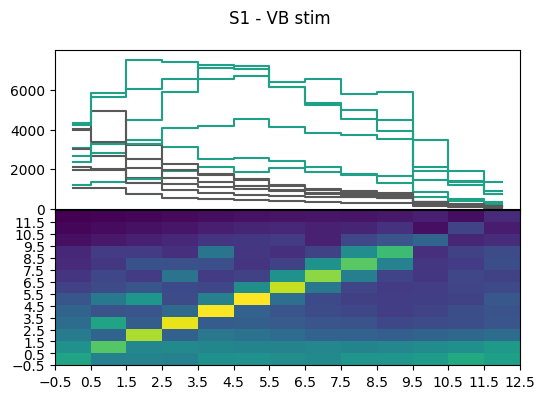

In [136]:
version = "stim"

### VB ###
### Imshow colour plot with step plot on top ###
mice = [13, 14, 17, 18, 19, 20]
vmax = 6000
vmax = None
maxfreq = []
for mouse in mice:
    maxfreq = []
    for column in range(13):
        maxfreq.append(globals()[f"{version}_vb_{mouse}"][column,column])
        globals()[f"maxfreq_vb_{mouse}"] = maxfreq

fig = plt.figure(figsize=(6,4.11))
gs = fig.add_gridspec(2, hspace=0)
axs = gs.subplots(sharex=True, sharey=False)
fig.suptitle(f'S1 - VB {version}')
#axs[0].step(range(7), np.mean(mice712_15_c_Ele2[2:9,:], axis=0), where='mid')
for mouse in mice:    
    axs[0].step(range(13), globals()[f"maxfreq_vb_{mouse}"], where='mid', color='#1fa187')
    axs[0].step(range(13), np.mean(globals()[f"base_vb_{mouse}"], axis=1), where='mid', color="#595959")
axs[0].set_ylim([0,8000])
axs[0].set_yticks(np.arange(0, 8000, 2000))

axs[1].imshow(globals()[f"{version}_vb"], origin='lower', cmap='viridis', vmax=vmax)
axs[1].set_aspect(1/3)
axs[1].set_xticks(np.arange(-0.5, 12.6, 1))
axs[1].set_yticks(np.arange(-0.5, 12, 1))
#axs[1].set_xticks(['8 Hz', '10 Hz', '12 Hz', '14 Hz', '16 Hz', '18 Hz', '20 Hz'])

# Hide x labels and tick labels for all but bottom plot.
for ax in axs:
    ax.label_outer()
#plt.savefig(f'S1 - VB {version}.png', transparent=True, bbox_inches='tight')

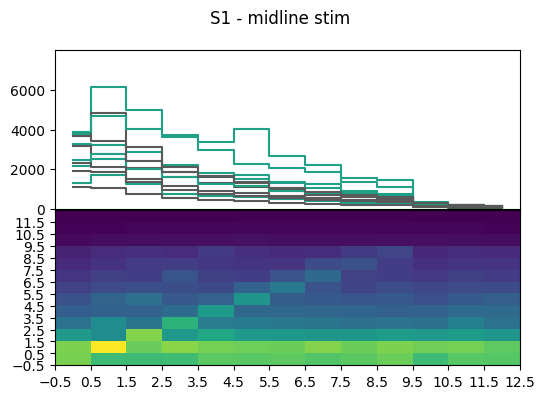

In [137]:
### MID ###
### Imshow colour plot with step plot on top ###
mice = [13, 14, 17, 18, 19, 20]
vmax = 6000
vmax = None
maxfreq = []
for mouse in mice:
    maxfreq = []
    for column in range(13):
        maxfreq.append(globals()[f"{version}_mid_{mouse}"][column,column])
        globals()[f"maxfreq_mid_{mouse}"] = maxfreq

fig = plt.figure(figsize=(6,4.11))
gs = fig.add_gridspec(2, hspace=0)
axs = gs.subplots(sharex=True, sharey=False)
fig.suptitle(f'S1 - midline {version}')
#axs[0].step(range(7), np.mean(mice712_15_c_Ele2[2:9,:], axis=0), where='mid')
for mouse in mice:    
    axs[0].step(range(13), globals()[f"maxfreq_mid_{mouse}"], where='mid', color='#1fa187')
    axs[0].step(range(13), np.mean(globals()[f"base_mid_{mouse}"], axis=1), where='mid', color="#595959")
axs[0].set_ylim([0,8000])
axs[0].set_yticks(np.arange(0, 8000, 2000))

axs[1].imshow(globals()[f"{version}_mid"], origin='lower', cmap='viridis', vmax=vmax)
axs[1].set_aspect(1/3)
axs[1].set_xticks(np.arange(-0.5, 12.6, 1))
axs[1].set_yticks(np.arange(-0.5, 12, 1))
#axs[1].set_xticks(['8 Hz', '10 Hz', '12 Hz', '14 Hz', '16 Hz', '18 Hz', '20 Hz'])

# Hide x labels and tick labels for all but bottom plot.
for ax in axs:
    ax.label_outer()
#plt.savefig(f'S1 - midline {version}.png', transparent=True, bbox_inches='tight')

In [147]:
baseline_mid=np.zeros((1,13))
baseline_mid[0,:]=np.mean((base_mid), axis=1)
baseline_mid=np.transpose(baseline_mid)

baseline_vb=np.zeros((1,13))
baseline_vb[0,:]=np.mean((base_vb), axis=1)
baseline_vb=np.transpose(baseline_vb)

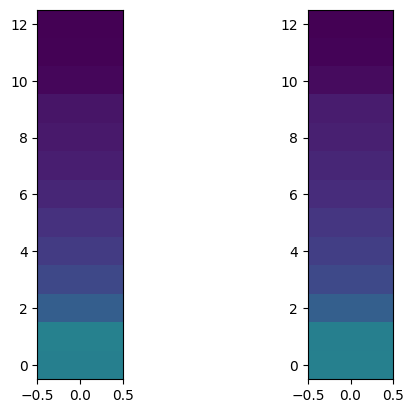

In [151]:
 fig, ax = plt.subplots(1,2)

ax[0].imshow(baseline_mid, origin='lower', cmap='viridis', vmax=6000)
ax[0].set_aspect(1/3)

ax[1].imshow(baseline_vb, origin='lower', cmap='viridis', vmax=6000)
ax[1].set_aspect(1/3)

plt.savefig('freq-spec Mid VB baseline.png', transparent=True, bbox_inches='tight')

#### Normalised version

In [ ]:
### VB ###
# For maxfreq (green line on step plot)
norm_vb_13 = norm13vb[5,:,:]
norm_vb_14 = norm14vb[5,:,:]
norm_vb_17 = norm17vb[5,:,:]
norm_vb_18 = norm18vb[9,:,:]
norm_vb_19 = norm19vb[3,:,:]
norm_vb_20 = norm20vb[4,:,:]

# For colour plot, averaged values
norm_vb = (norm13vb[5,:,:]+norm14vb[5,:,:]+norm17vb[5,:,:]+norm18vb[9,:,:]+norm19vb[3,:,:]+norm20vb[4,:,:])/6
base_vb = (base13vb[5,:,:]+base14vb[5,:,:]+base17vb[5,:,:]+base18vb[9,:,:]+base19vb[3,:,:]+base20vb[4,:,:])/6


### MID ###
# For maxfreq (green line on step plot)
norm_mid_13 = norm13mid[5,:,:]
norm_mid_14 = norm14mid[5,:,:]
norm_mid_17 = norm17mid[5,:,:]
norm_mid_18 = norm18mid[9,:,:]
norm_mid_19 = norm19mid[3,:,:]
norm_mid_20 = norm20mid[4,:,:]

# For colour plot, averaged values
norm_mid = (norm13mid[5,:,:]+norm14mid[5,:,:]+norm17mid[5,:,:]+norm18mid[9,:,:]+norm19mid[3,:,:]+norm20mid[4,:,:])/6
base_mid = (base13mid[5,:,:]+base14mid[5,:,:]+base17mid[5,:,:]+base18mid[9,:,:]+base19mid[3,:,:]+base20mid[4,:,:])/6

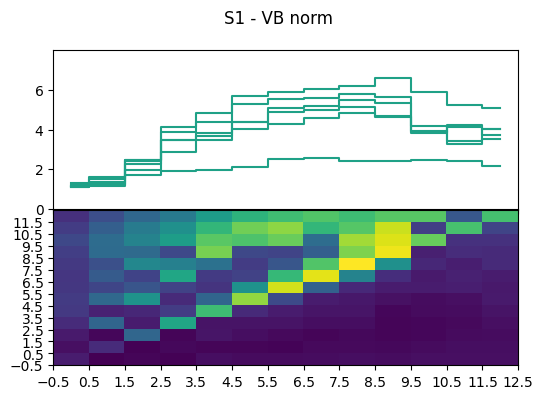

In [138]:
version = "norm"

### VB ###
### Imshow colour plot with step plot on top ###
mice = [13, 14, 17, 18, 19, 20]
vmax = 6000
vmax = None
maxfreq = []
for mouse in mice:
    maxfreq = []
    for column in range(13):
        maxfreq.append(globals()[f"{version}_vb_{mouse}"][column,column])
        globals()[f"maxfreq_vb_{mouse}"] = maxfreq

fig = plt.figure(figsize=(6,4.11))
gs = fig.add_gridspec(2, hspace=0)
axs = gs.subplots(sharex=True, sharey=False)
fig.suptitle(f'S1 - VB {version}')
#axs[0].step(range(7), np.mean(mice712_15_c_Ele2[2:9,:], axis=0), where='mid')
for mouse in mice:    
    axs[0].step(range(13), globals()[f"maxfreq_vb_{mouse}"], where='mid', color='#1fa187')
    #axs[0].step(range(13), np.mean(globals()[f"base_vb_{mouse}"], axis=1), where='mid', color="#595959")
axs[0].set_ylim([0,8])
axs[0].set_yticks(np.arange(0, 8, 2))

axs[1].imshow(globals()[f"{version}_vb"], origin='lower', cmap='viridis', vmax=vmax)
axs[1].set_aspect(1/3)
axs[1].set_xticks(np.arange(-0.5, 12.6, 1))
axs[1].set_yticks(np.arange(-0.5, 12, 1))
#axs[1].set_xticks(['8 Hz', '10 Hz', '12 Hz', '14 Hz', '16 Hz', '18 Hz', '20 Hz'])

# Hide x labels and tick labels for all but bottom plot.
for ax in axs:
    ax.label_outer()
#plt.savefig(f'S1 - VB {version}.png', transparent=True, bbox_inches='tight')

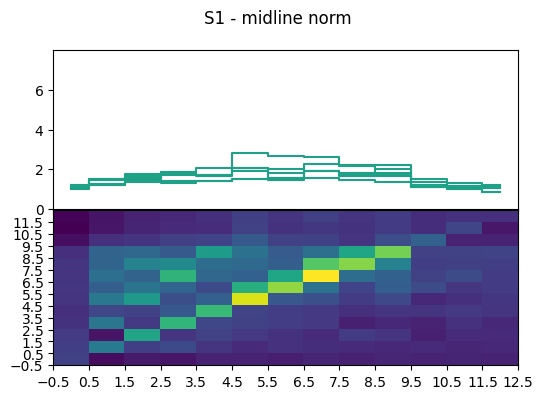

In [139]:
### MID ###
### Imshow colour plot with step plot on top ###
mice = [13, 14, 17, 18, 19, 20]
vmax = 6000
vmax = None
maxfreq = []
for mouse in mice:
    maxfreq = []
    for column in range(13):
        maxfreq.append(globals()[f"{version}_mid_{mouse}"][column,column])
        globals()[f"maxfreq_mid_{mouse}"] = maxfreq

fig = plt.figure(figsize=(6,4.11))
gs = fig.add_gridspec(2, hspace=0)
axs = gs.subplots(sharex=True, sharey=False)
fig.suptitle(f'S1 - midline {version}')
#axs[0].step(range(7), np.mean(mice712_15_c_Ele2[2:9,:], axis=0), where='mid')
for mouse in mice:    
    axs[0].step(range(13), globals()[f"maxfreq_mid_{mouse}"], where='mid', color='#1fa187')
    #axs[0].step(range(13), np.mean(globals()[f"base_mid_{mouse}"], axis=1), where='mid', color="#595959")
axs[0].set_ylim([0,8])
axs[0].set_yticks(np.arange(0, 8, 2))

axs[1].imshow(globals()[f"{version}_mid"], origin='lower', cmap='viridis', vmax=vmax)
axs[1].set_aspect(1/3)
axs[1].set_xticks(np.arange(-0.5, 12.6, 1))
axs[1].set_yticks(np.arange(-0.5, 12, 1))
#axs[1].set_xticks(['8 Hz', '10 Hz', '12 Hz', '14 Hz', '16 Hz', '18 Hz', '20 Hz'])

# Hide x labels and tick labels for all but bottom plot.
for ax in axs:
    ax.label_outer()
#plt.savefig(f'S1 - midline {version}.png', transparent=True, bbox_inches='tight')

In [16]:
norm_mid = np.mean((norm13mid[5], norm14mid[5], norm17mid[5], norm18mid[9], norm19mid[3], norm20mid[4]), axis=0)

norm_vb = np.mean((norm13vb[5], norm14vb[5], norm17vb[5], norm18vb[9], norm19vb[3], norm20vb[4]), axis=0)

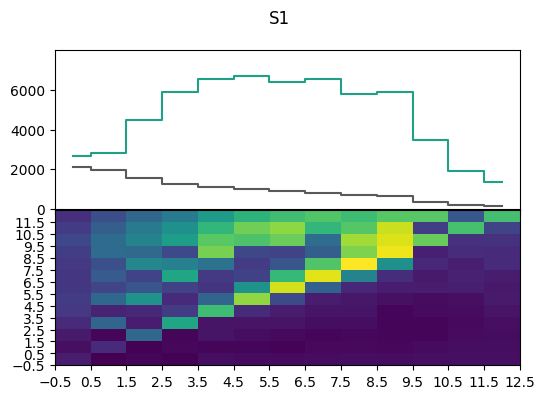

In [17]:
# One mouse
### Imshow colour plot with step plot on top ###
vmax = 6000
vmax = None
maxfreq = []
for column in range(13):
    maxfreq.append(stim13vb[5,column,column])

fig = plt.figure(figsize=(6,4.11))
gs = fig.add_gridspec(2, hspace=0)
axs = gs.subplots(sharex=True, sharey=False)
fig.suptitle('S1')
#axs[0].step(range(7), np.mean(mice712_15_c_Ele2[2:9,:], axis=0), where='mid')
axs[0].step(range(13), maxfreq, where='mid', color='#1fa187')
axs[0].step(range(13), np.mean(base13vb[5], axis=1), where='mid', color="#595959")
axs[0].set_ylim([0,8000])
axs[0].set_yticks(np.arange(0, 8000, 2000))

axs[1].imshow(norm_vb, origin='lower', cmap='viridis', vmax=vmax)
axs[1].set_aspect(1/3)
axs[1].set_xticks(np.arange(-0.5, 12.6, 1))
axs[1].set_yticks(np.arange(-0.5, 12, 1))
#axs[1].set_xticks(['8 Hz', '10 Hz', '12 Hz', '14 Hz', '16 Hz', '18 Hz', '20 Hz'])

# Hide x labels and tick labels for all but bottom plot.
for ax in axs:
    ax.label_outer()
#plt.savefig('S1 imshow-step 13_14 vb.png', transparent=True, bbox_inches='tight')

### Results graph 4: Coordination with SWRs

In [27]:
mouse13_SWR = np.load("13 and 14/13/SWR count mouse13 mid-vb.npy")
mouse14_SWR = np.load("13 and 14/14/SWR count mouse14 mid-vb.npy")

mouse17_SWR = np.load("17 and 18/17/SWR count mouse17 mid-vb.npy")
mouse18_SWR = np.load("17 and 18/18/SWR count mouse18 mid-vb.npy")

mouse19_SWR = np.load("19 and 20/19/SWR count mouse19 mid-vb.npy")
mouse20_SWR = np.load("19 and 20/20/SWR count mouse20 mid-vb.npy")

#Meaning of dimensions: (mid CA1 ipsi & contra then VB CA1 ipsi & contra; stim freqs 2-90 Hz; bins 5 before, 5 during, 5 after stim, & 10s after stim with 0.5s per bin)

In [152]:
small_bins_mid = np.zeros((7,15))
small_bins_vb = np.zeros((7,15))

for x, mouse in enumerate(mice):
    if mouse == 13 or 18:
        side = 0
    else:
        side = 1
    
    small_bins_mid[x] = np.sum(globals()[f"mouse{mouse}_SWR"][side, 5:9, :15], axis=0)
    small_bins_vb[x] = np.sum(globals()[f"mouse{mouse}_SWR"][side+2, 5:9, :15], axis=0)

small_bins_mid[6, :] = np.mean(small_bins_mid[:6, :], axis=0)
small_bins_vb[6, :] = np.mean(small_bins_vb[:6, :], axis=0)

small_bins = np.concatenate((small_bins_mid, np.zeros((1, 15)), small_bins_vb))
np.savetxt("Coord SWR small bins.csv", small_bins, fmt='%10.2f')

In [153]:
large_bins_mid = np.zeros((7,8))
large_bins_vb = np.zeros((7,8))

for x, mouse in enumerate(mice):
    if mouse == 13 or 18:
        side = 0
    else:
        side = 1
    #Midline
    large_bins_mid[x, 0] = np.sum(globals()[f"mouse{mouse}_SWR"][side, 5:9, :5])
    large_bins_mid[x, 1] = np.sum(globals()[f"mouse{mouse}_SWR"][side, 5:9, 5:10])
    large_bins_mid[x, 2] = np.sum(globals()[f"mouse{mouse}_SWR"][side, 5:9, 10:15])

    afterstim = np.zeros((4, 5))
    afterstim_norm = np.zeros((4, 5))
    for a in range(5):
        afterstim[:, a] = np.sum((globals()[f"mouse{mouse}_SWR"][side, 5:9, 15+2*a], globals()[f"mouse{mouse}_SWR"][side, 5:9, 16+2*a]), axis=0)
    
    freqs = range(12, 20, 2)
    for b, freq in enumerate(freqs):
        afterstim_norm[b, :] = (afterstim[b, :]*10)/freq

    large_bins_mid[x, 3:] = np.sum(afterstim_norm, axis=0)

    #VB
    large_bins_vb[x, 0] = np.sum(globals()[f"mouse{mouse}_SWR"][side+2, 5:9, :5])
    large_bins_vb[x, 1] = np.sum(globals()[f"mouse{mouse}_SWR"][side+2, 5:9, 5:10])
    large_bins_vb[x, 2] = np.sum(globals()[f"mouse{mouse}_SWR"][side+2, 5:9, 10:15])

    afterstim = np.zeros((4, 5))
    afterstim_norm = np.zeros((4, 5))
    for a in range(5):
        afterstim[:, a] = np.sum((globals()[f"mouse{mouse}_SWR"][side+2, 5:9, 15+2*a], globals()[f"mouse{mouse}_SWR"][side+2, 5:9, 16+2*a]), axis=0)
    
    freqs = range(12, 20, 2)
    for b, freq in enumerate(freqs):
        afterstim_norm[b, :] = (afterstim[b, :]*10)/freq

    large_bins_vb[x, 3:] = np.sum(afterstim_norm, axis=0)

large_bins_mid[6, :] = np.mean(large_bins_mid[:6, :], axis=0)
large_bins_vb[6, :] = np.mean(large_bins_vb[:6, :], axis=0)

large_bins = np.concatenate((large_bins_mid, np.zeros((1,8)), large_bins_vb))
np.savetxt("Coord SWR large bins.csv", large_bins, fmt='%10.2f')